In [38]:
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import linregress
sns.set_theme()

In [3]:
#data analysis preparation
data = pd.read_csv('project 2 data.csv', index_col="Location")
new_data = pd.read_csv('Political affiliation and average income data.csv', index_col = "Location")

data_analysis = pd.read_csv('refined combined data.csv')
analysis_overall = data_analysis.sort_values('Admin_Per_100K', ascending=False)
analysis_distribution = data_analysis.sort_values('Dist_Per_100K', ascending=False)
analysis_Income = data_analysis.sort_values('Per_Capita_Income_(2022)', ascending=False)

In [109]:
#removing rows that's not within the 50 states in the US
removed_rows_data = data.drop(["AS", "BP2", "DC", "DD2", "FM", "GU", "IH2", "MH", "MP", "PR", "PW", "US", "VA2", "VI"], inplace = False)

In [5]:
refined_combined_data = removed_rows_data.join(new_data, how = 'outer')

In [6]:
#politcal leaning analysis preparation
political_leaning_analysis = pd.read_csv('refined combined data.csv')

#pd.factorize will turn integers into numerical value. I assigned it a new column to help differentiate what each one is tied to.
political_leaning_analysis['Politcal_Leaning_refined'] = pd.factorize(political_leaning_analysis['Political_Leaning'])[0] + 1
political_leaning_analysis

,Location,Dist_Per_100K,Admin_Per_100K,Admin_Per_100k_5Plus,Admin_Per_100k_12Plus,Admin_Per_100k_18Plus,Admin_Per_100k_65Plus,Per_Capita_Income_(2022),Political_Leaning,Politcal_Leaning_refined
0,AK,5526870,3425225,3656176,3918368,4029983,5912717,68919,Republican,1
1,AL,4716121,2707481,2873072,3100400,3236810,4991355,50637,Republican,1
2,AR,5192754,3053550,3244453,3488885,3619142,5427420,51787,Republican,1
3,AZ,5107464,3789100,4006981,4256413,4367750,6415342,56667,Swing State,2
4,CA,5718367,4222979,4459859,4722302,4824204,6536206,77339,Democrat,3
5,CO,5742468,4263651,4481498,4736089,4868306,7082981,74167,Democrat,3
6,CT,6242098,4789603,5014304,5265786,5381946,7431091,84972,Democrat,3
7,DE,6389169,4211468,4438446,4704270,4826086,7092278,61387,Democrat,3
8,FL,5351068,3713945,3913709,4165151,4288331,6106445,63597,Swing State,2
9,GA,5054111,3044756,3231436,3476942,3618021,5477800,57129,Swing State,2


In [7]:
#Average Age preparation

#reading the politcal leaning data and the median age to allow for me to input index_col. this is done so that when I join the data, new columns aren't made, but integrated in the dataframe already
#with the same location name.
dummy_data =  pd.read_csv('political_leaning_analysis data.csv',index_col = "Location")
median_age = pd.read_csv('median_age.csv', index_col = "Location")
average_age = dummy_data.join(median_age, how = 'outer')

#another column was created, which is called unnamed: 0. So, I created another variable to able to drop that new column.
age_analysis = pd.read_csv('average_age_analysis.csv')
age_analysis = age_analysis.drop('Unnamed: 0', axis=1)

#then I read the csv to use that instead of the one with the unnmaed column
refined_age_analysis = pd.read_csv('refined_age_analysis.csv')

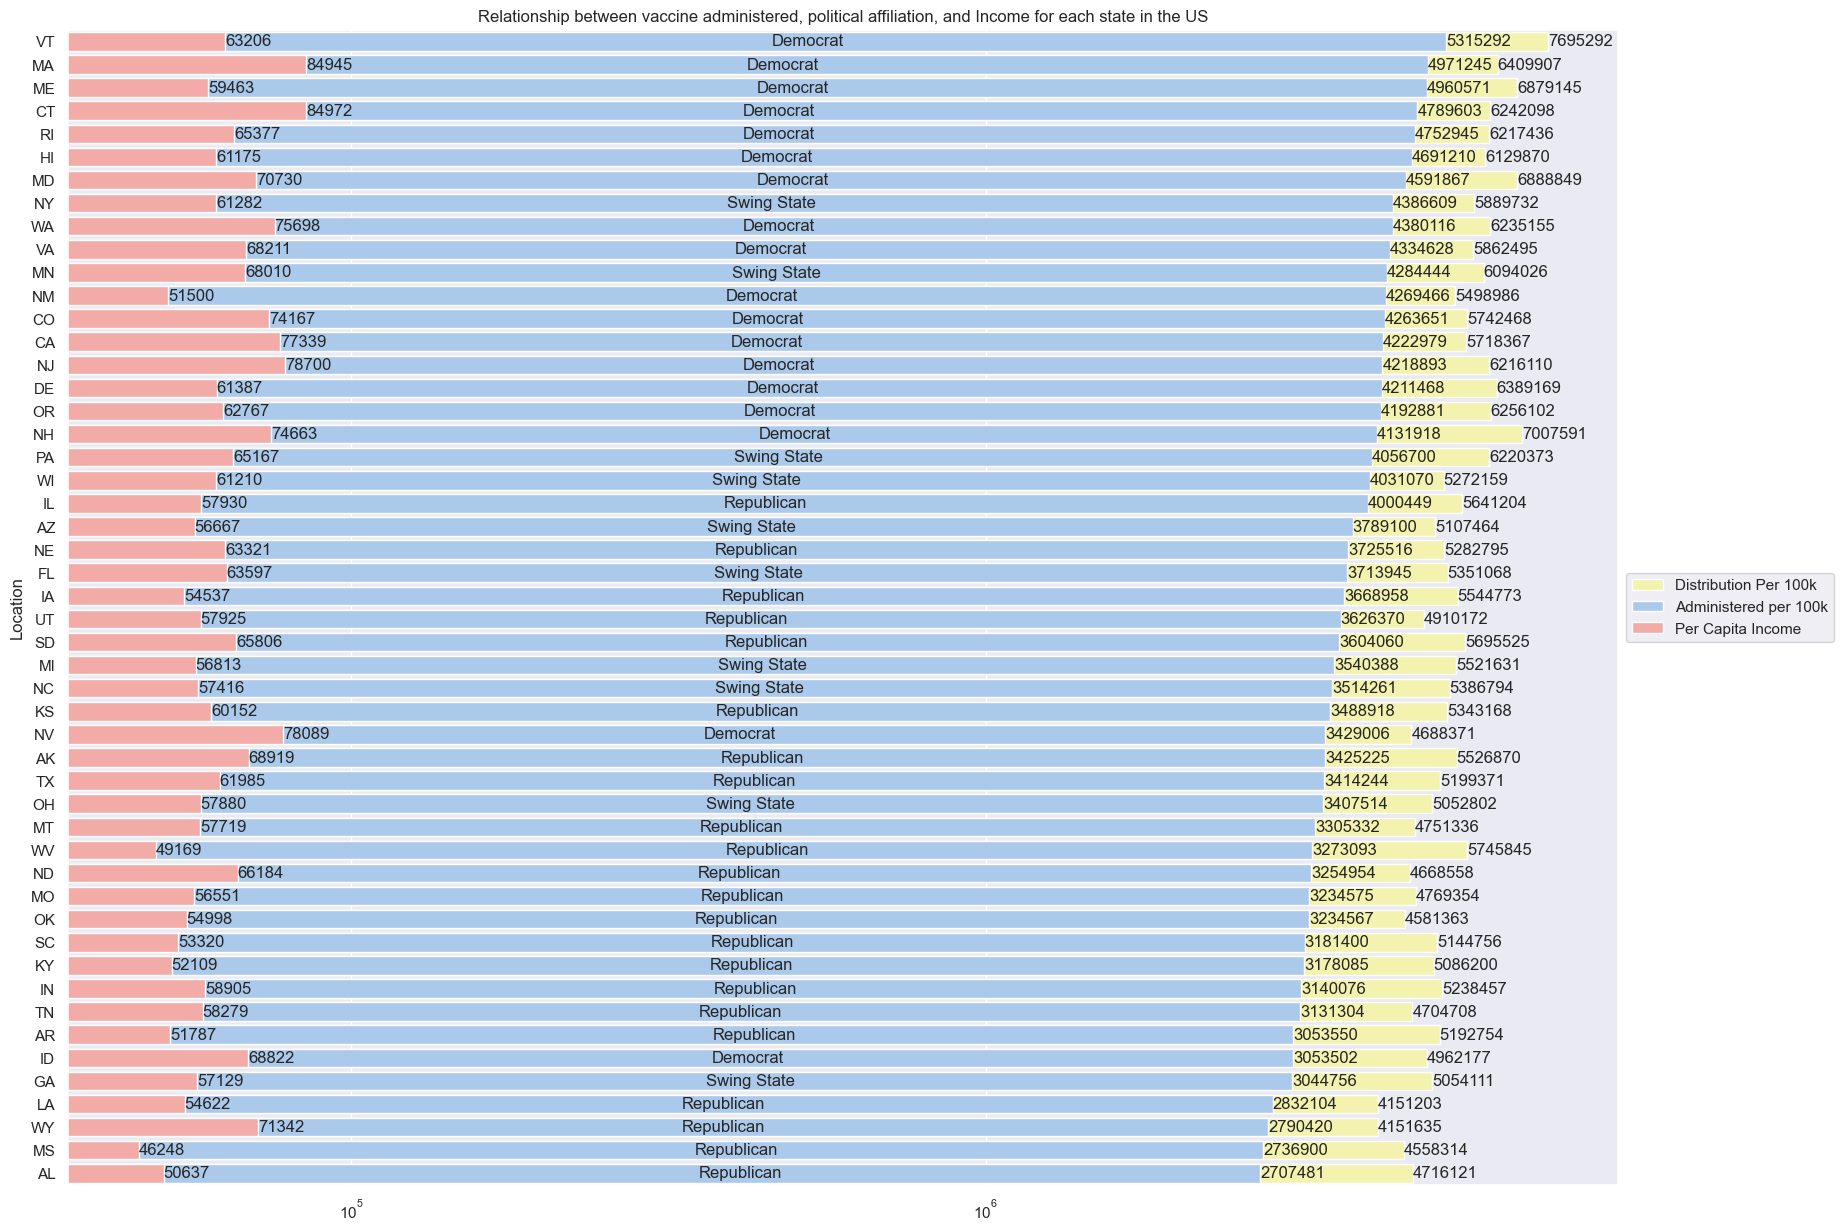

In [111]:
#Administered is ranked from highest to lowest disregarding the rest of the data
f, ax = plt.subplots(figsize=(20, 15))
sns.set_color_codes("pastel")

#adding the data to the bar plot
sns.barplot(x="Dist_Per_100K", y="Location", data = analysis_overall, label="Distribution Per 100k", color="y",log=True,)
sns.barplot(x="Admin_Per_100K", y="Location", data = analysis_overall, label="Administered per 100k", color="b",log=True,)
sns.barplot(x="Per_Capita_Income_(2022)", y="Location", data = analysis_overall, label="Per Capita Income", color="r",log=True,)

ax.bar_label(ax.containers[1], label_type='edge',labels=analysis_overall['Admin_Per_100K'])
ax.bar_label(ax.containers[0], label_type='edge',labels=analysis_overall['Dist_Per_100K'])
ax.bar_label(ax.containers[0], label_type='center',labels=analysis_overall['Political_Leaning'])
ax.bar_label(ax.containers[2], label_type='edge',labels=analysis_overall['Per_Capita_Income_(2022)'])


ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(xlabel='', ylabel='Location')
plt.title('Relationship between vaccine administered, political affiliation, and Income for each state in the US')
plt.savefig('overall data graph.png')

Text(0.5, 1.0, 'Relationship between vaccine administered, political affiliation, and Income for each state in the US')

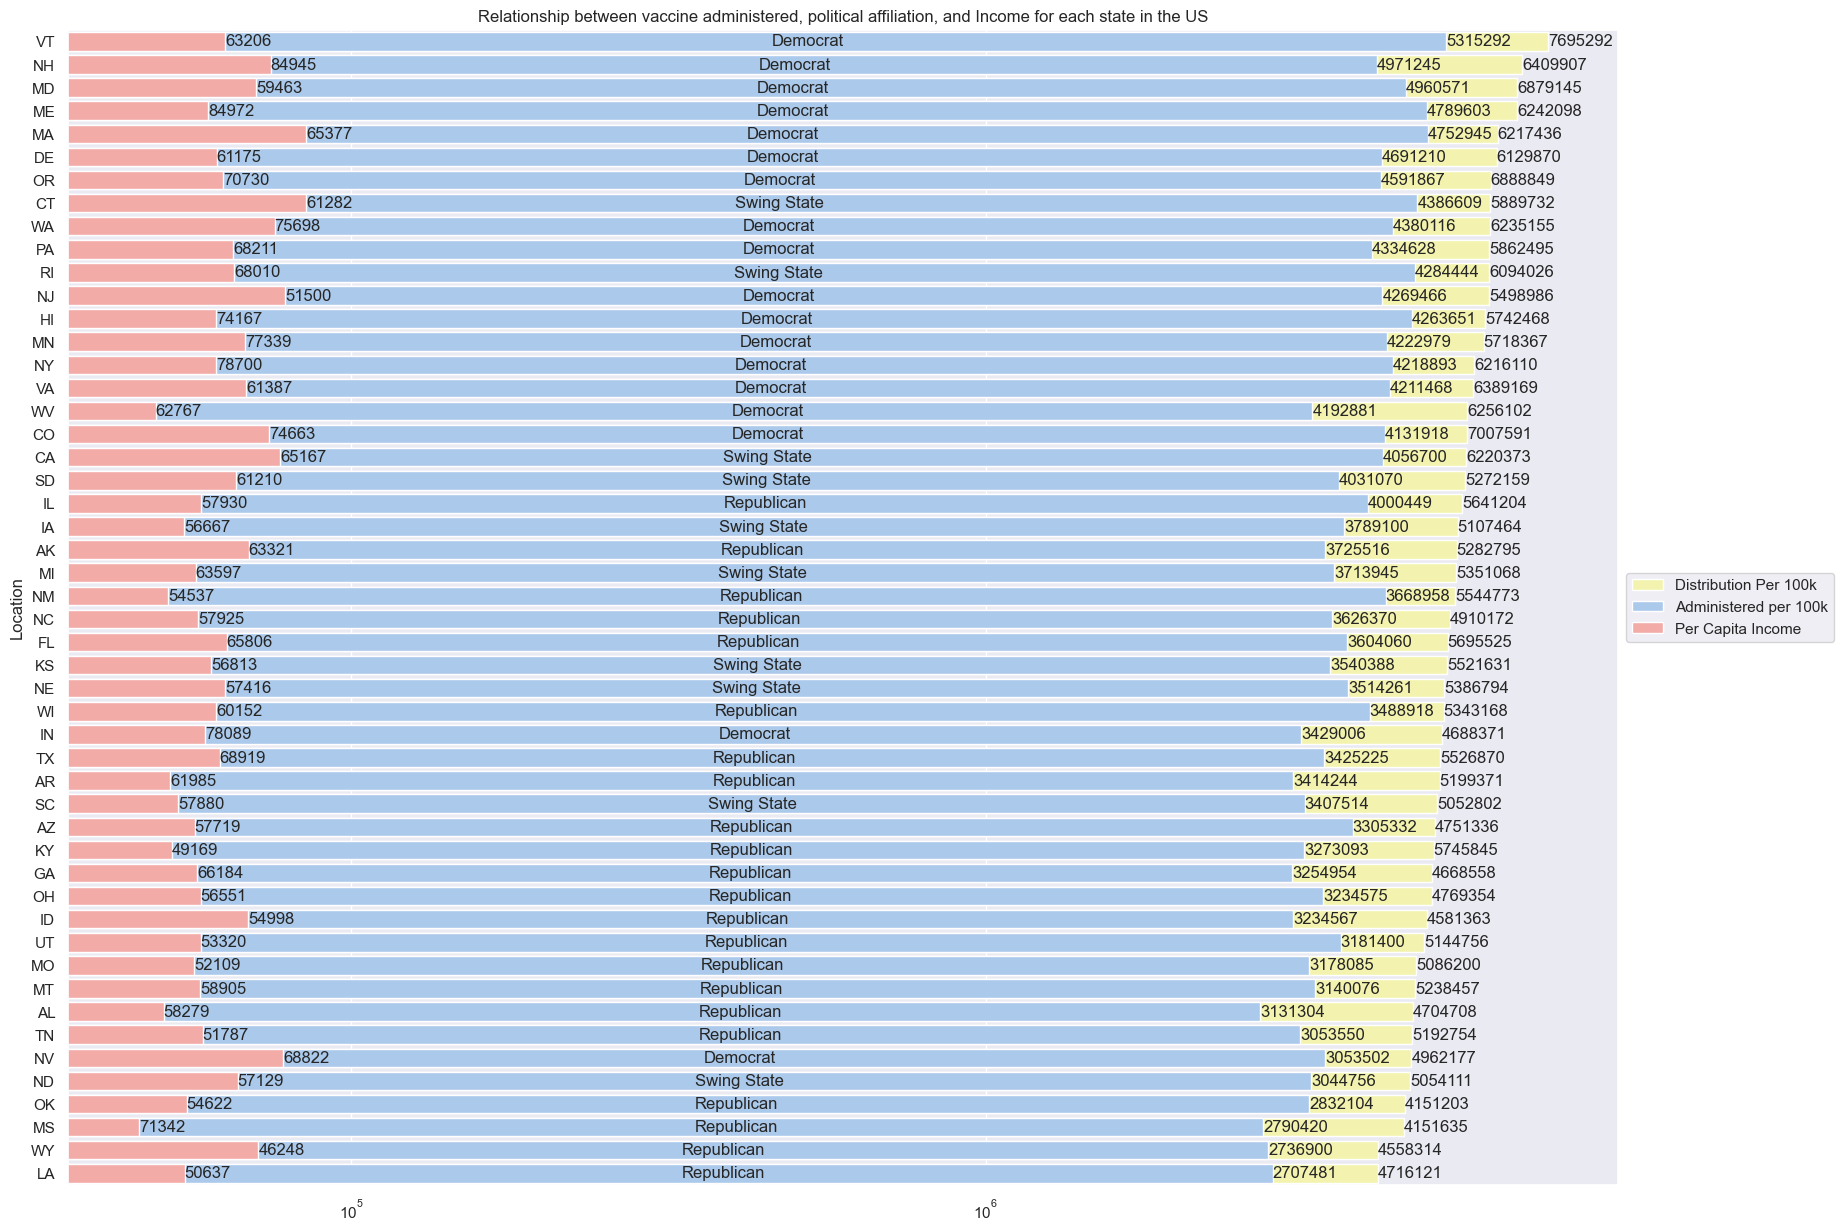

In [9]:
#Distributgion is ranked from highest to lowest disregarding the rest of the data
f, ax = plt.subplots(figsize=(20, 15))
sns.set_color_codes("pastel")

#adding the data to the bar plot
sns.barplot(x="Dist_Per_100K", y="Location", data = analysis_distribution, label="Distribution Per 100k", color="y",log=True,)
sns.barplot(x="Admin_Per_100K", y="Location", data = analysis_distribution, label="Administered per 100k", color="b",log=True,)
sns.barplot(x="Per_Capita_Income_(2022)", y="Location", data = analysis_distribution, label="Per Capita Income", color="r",log=True,)

ax.bar_label(ax.containers[1], label_type='edge',labels=analysis_overall['Admin_Per_100K'])
ax.bar_label(ax.containers[0], label_type='edge',labels=analysis_overall['Dist_Per_100K'])
ax.bar_label(ax.containers[0], label_type='center',labels=analysis_overall['Political_Leaning'])
ax.bar_label(ax.containers[2], label_type='edge',labels=analysis_overall['Per_Capita_Income_(2022)'])


ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(xlabel='', ylabel='Location')
plt.title('Relationship between vaccine administered, political affiliation, and Income for each state in the US')

Text(0.5, 1.0, 'Relationship between vaccine administered, political affiliation, and Income for each state in the US')

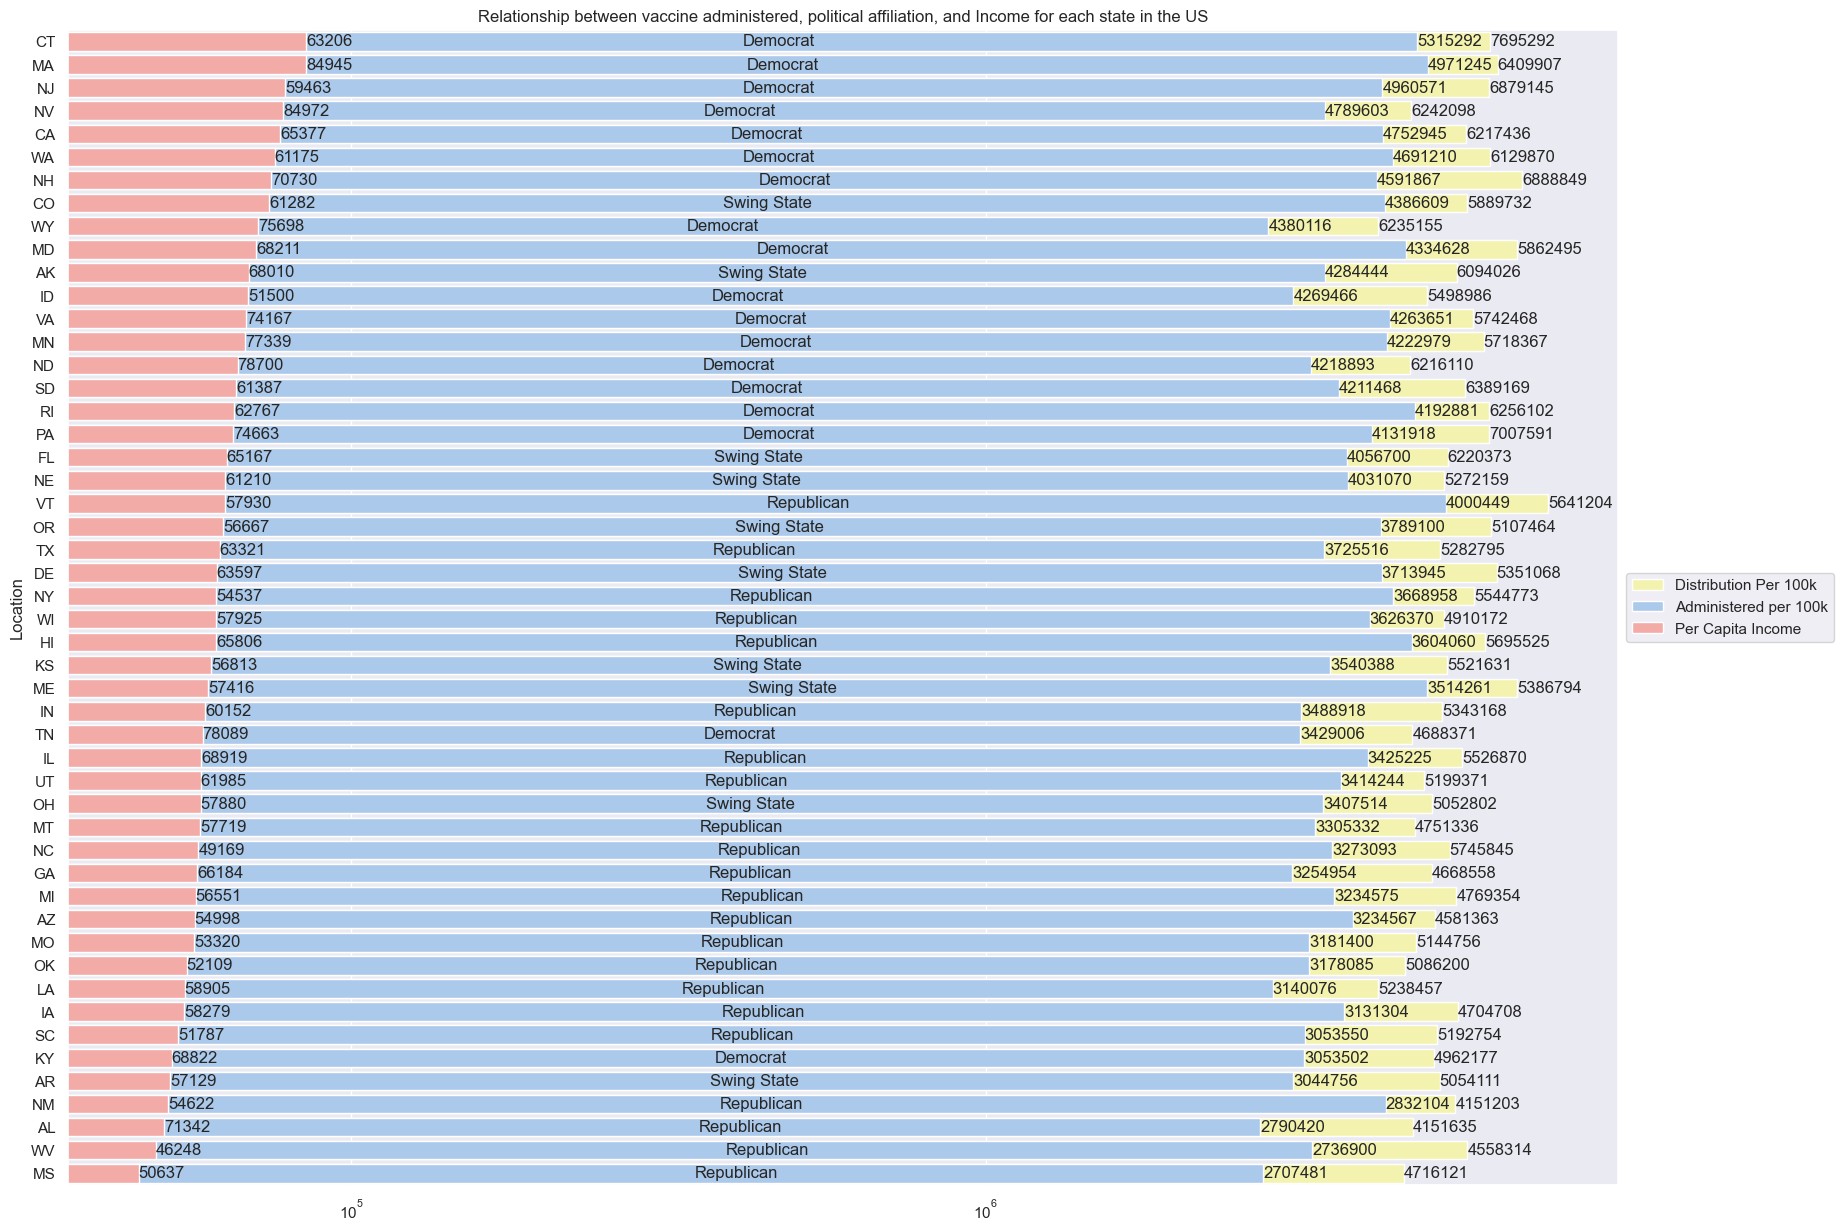

In [10]:
#income is ranked from highest to lowest disregarding the rest of the data
f, ax = plt.subplots(figsize=(20, 15))
sns.set_color_codes("pastel")

#adding the data to the bar plot
sns.barplot(x="Dist_Per_100K", y="Location", data = analysis_Income, label="Distribution Per 100k", color="y",log=True,)
sns.barplot(x="Admin_Per_100K", y="Location", data = analysis_Income, label="Administered per 100k", color="b",log=True,)
sns.barplot(x="Per_Capita_Income_(2022)", y="Location", data = analysis_Income, label="Per Capita Income", color="r",log=True,)

ax.bar_label(ax.containers[1], label_type='edge',labels=analysis_overall['Admin_Per_100K'])
ax.bar_label(ax.containers[0], label_type='edge',labels=analysis_overall['Dist_Per_100K'])
ax.bar_label(ax.containers[0], label_type='center',labels=analysis_overall['Political_Leaning'])
ax.bar_label(ax.containers[2], label_type='edge',labels=analysis_overall['Per_Capita_Income_(2022)'])


ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(xlabel='', ylabel='Location')
plt.title('Relationship between vaccine administered, political affiliation, and Income for each state in the US')

In [11]:
#looking at overall income and admin distribution
x = data_analysis[['Admin_Per_100K','Per_Capita_Income_(2022)']]
y = data_analysis['Dist_Per_100K']

x = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:          Dist_Per_100K   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     78.09
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           1.15e-15
Time:                        16:03:33   Log-Likelihood:                -710.56
No. Observations:                  50   AIC:                             1427.
Df Residuals:                      47   BIC:                             1433.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [13]:
#INCLUDE: univariate correlation: age vs. vaccine administration, y number of doses per state and x would be political affiliation and income. 
#scatter plot: y axis doses per 100k (use size of points to indicate a variable)
#political affiliation: scale between red and blue; turn into numerical. scale a color map to match that.

#find the average age and tie to back to vaccine administyered

#admin_per_100k ~ age + income + political_leaning

Text(0.5, 0, 'Political Affiliation')

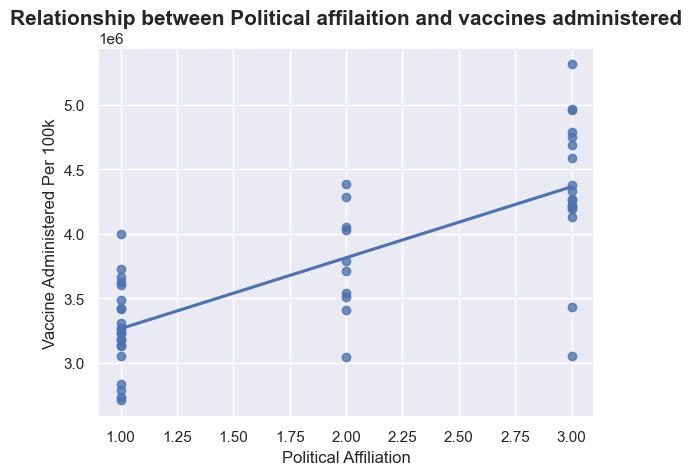

In [83]:
#setting replot to a variable to allow me to create custom axis and title
political_affiliation = sns.regplot(data=refined_age_analysis, x="Politcal_Leaning_refined", y="Admin_Per_100K",ci=None,truncate=True)

#customizing axis and title
political_affiliation.set_title('Relationship between Political affilaition and vaccines administered', fontdict={'size': 15, 'weight': 'bold'})
political_affiliation.set_ylabel('Vaccine Administered Per 100k', fontdict={'size': 12})
political_affiliation.set_xlabel('Political Affiliation', fontdict={'size': 12})

Text(0.5, 0, 'Political Affiliation')

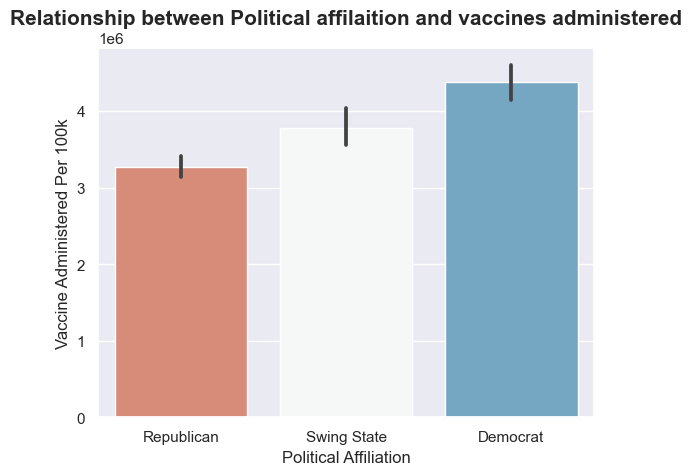

In [110]:
#setting barplot to a variable to allow me to create custom axis and title
political_affiliation_bar = sns.barplot(data=refined_age_analysis, x="Political_Leaning", y="Admin_Per_100K",palette = 'RdBu')

#customizing axis and title
political_affiliation_bar.set_title('Relationship between Political affilaition and vaccines administered', fontdict={'size': 15, 'weight': 'bold'})
political_affiliation_bar.set_ylabel('Vaccine Administered Per 100k', fontdict={'size': 12})
political_affiliation_bar.set_xlabel('Political Affiliation', fontdict={'size': 12})


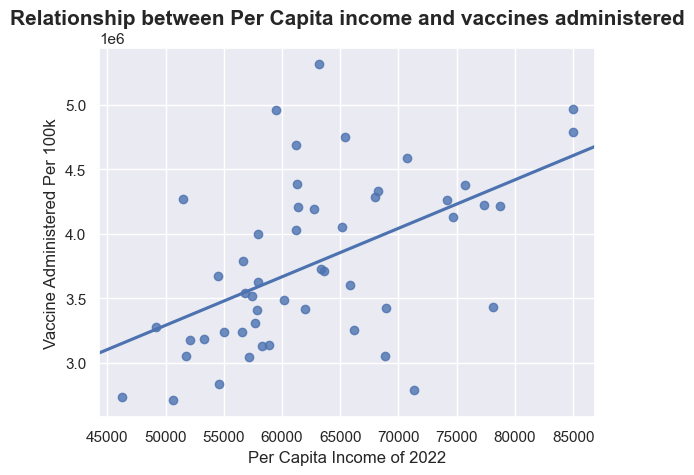

In [106]:
#setting replot to a variable to allow me to create custom axis and title
capita_income = sns.regplot(data=refined_age_analysis, x="Per_Capita_Income_(2022)", y="Admin_Per_100K", ci=None,truncate=False)

#customizing axis and title
capita_income.set_title('Relationship between Per Capita income and vaccines administered', fontdict={'size': 15, 'weight': 'bold'})
capita_income.set_ylabel('Vaccine Administered Per 100k', fontdict={'size': 12})
capita_income.set_xlabel('Per Capita Income of 2022', fontdict={'size': 12})
plt.savefig('Per capita analysis graph.png')

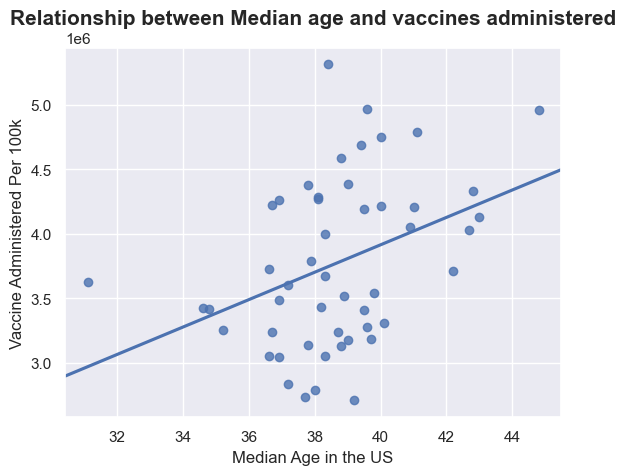

In [107]:
#setting replot to a variable to allow me to create custom axis and title
Median_age = sns.regplot(data=refined_age_analysis, x="MedianAge", y="Admin_Per_100K", ci=None, fit_reg=True, truncate=False)


#customizing axis and title
Median_age.set_title('Relationship between Median age and vaccines administered', fontdict={'size': 15, 'weight': 'bold'})
Median_age.set_ylabel('Vaccine Administered Per 100k', fontdict={'size': 12})
Median_age.set_xlabel('Median Age in the US', fontdict={'size': 12})
plt.savefig('age analysis graph.png')

In [103]:
x = refined_age_analysis[['Per_Capita_Income_(2022)','MedianAge','Politcal_Leaning_refined']]
y = refined_age_analysis['Admin_Per_100K']

x = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)
plt.savefig('analysis results.png')

                            OLS Regression Results                            
Dep. Variable:         Admin_Per_100K   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     22.15
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           5.06e-09
Time:                        17:46:14   Log-Likelihood:                -717.53
No. Observations:                  50   AIC:                             1443.
Df Residuals:                      46   BIC:                             1451.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<Figure size 640x480 with 0 Axes>